In [423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns


# Preparing the data sets


### Tiền xử lý

In [424]:
path= 'nursery.data.csv'
data = pd.read_csv(path,header=None)


In [425]:
data.head()

,0,1,2,3,4,5,6,7,8
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


### Lấy feature và label

In [426]:
feature = data.iloc[:, :-1]
label =  data.iloc[:, -1]


In [427]:
print(label.shape[0])
print(feature.shape[0])


12960
12960


### Tách thành 16 subset trong đó với mỗi một bộ 4 subset ứng với một tỷ lệ chia
### 40/60 , 60/40,  80/20,  90/10

##### Hash Feature về số

In [428]:
def encode_string_float(data):
    count = 1
    map_sym_num = {}
    for i in range(data.shape[0]):
        u= data.loc[i]
        if u not in map_sym_num:
            count+=1
            map_sym_num[u] = count
        data.loc[i] = (map_sym_num[u])

    return data

In [429]:
# for i in range(feature.shape[1]):
#     count = 1
#     map_sym_num = {}
#     for j in range(feature.shape[0]):
#         u = feature.loc[j,i]
#         if( u not in map_sym_num):
#             map_sym_num[u] = count
#             count+=1
#         feature.loc[j,i] = map_sym_num[u]
# feature.head()
for i in range(feature.shape[1]):
    feature.iloc[:,i] = feature.iloc[:,i].apply(hash)


In [430]:
def split_data_with_proportions(pro_train):
    pro_test = 1 - pro_train
    feature_train, feature_test, label_train, label_test = train_test_split(feature, label, test_size=pro_test, stratify=label)
    return feature_train, label_train, feature_test, label_test

In [431]:
# Lưu trong mảng list_data
list_data_set = []

# Tách với tỷ lệ train/set là 40/60
feature_train,label_train,feature_test,label_test = split_data_with_proportions(0.4)
list_data_set.append((feature_train,label_train,feature_test,label_test))

# Tách với tỷ lệ train/set là 60/40
feature_train,label_train,feature_test,label_test = split_data_with_proportions(0.6)
list_data_set.append((feature_train,label_train,feature_test,label_test))

# Tách với tỷ lệ train/set là 80/20
feature_train,label_train,feature_test,label_test = split_data_with_proportions(0.8)
list_data_set.append((feature_train,label_train,feature_test,label_test))

# Tách với tỷ lệ train/set là 90/10
feature_train,label_train,feature_test,label_test = split_data_with_proportions(0.9)
list_data_set.append((feature_train,label_train,feature_test,label_test))


### Trực quan hóa các tỷ lệ chia

#### Map các label với một số để tạo ma trận phân phối

In [432]:
map_label = {}
map_reverse = {}
count = 0
for u in label:
    if u not in map_label:
        map_label[u]=count
        map_reverse[count] = u
        count+=1
number_of_class = count
print(number_of_class)

5


### Tính tần suất xuất hiện của các class trong mỗi tập label

In [433]:
def calculator_distribution(just_label):
    ans = np.array([0 for _ in range(number_of_class)])
    for u in just_label:
        index = map_label[u]
        ans[index] +=1
    return ans

### Hàm xuất biểu đồ cột của với bảng tần suất của từng Dataset

In [434]:
def show_the_bar(distribution):
    sets = ['Original Set', 'Train Set', 'Test Set']
    diff_class = [map_reverse[i] for i in range(number_of_class)]
    plt.figure(figsize=(10, 6))

    bar_width = 0.1
    x = np.arange(len(sets))

    for i, cls in enumerate(diff_class):
        plt.bar(x + i * bar_width, distribution[:, i], width=bar_width, label=cls)

    plt.title('Class Distribution in Datasets')
    plt.xlabel('Datasets')
    plt.ylabel('Number of Samples')
    plt.xticks(x + bar_width * (len(diff_class) - 1) / 2, sets)
    plt.legend()

    plt.show()

    return 

In [435]:

def visualize_distribution(number_of_dataset_correspond_propotions):
    feature_train,label_train,feature_test,label_test = list_data_set[number_of_dataset_correspond_propotions]

    matrix_distribution = np.array([[0 for _ in range(number_of_class)] for _ in range(3)])
    
    matrix_distribution[0,:] = calculator_distribution(label)
    matrix_distribution[1,:] = calculator_distribution(label_train)
    matrix_distribution[2,:] = calculator_distribution(label_test)
    
    show_the_bar(matrix_distribution)
    print(matrix_distribution)



### Train/test: 40/60

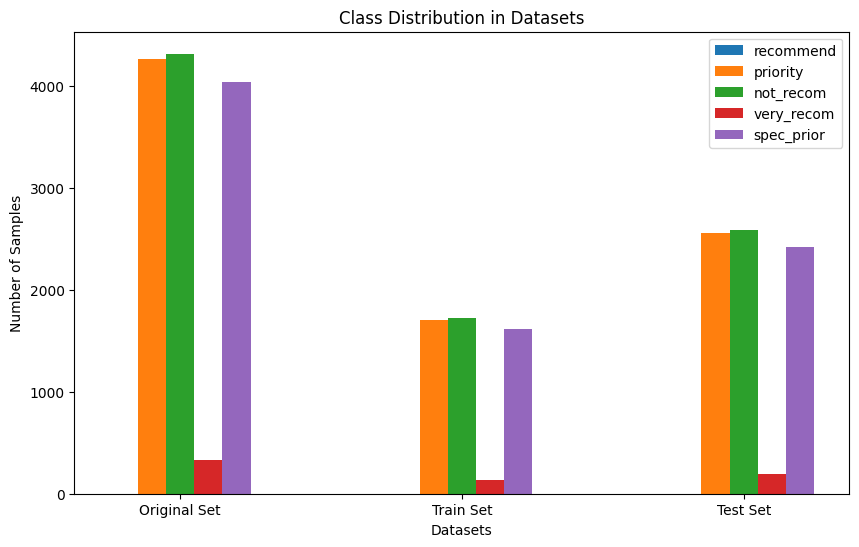

[[   2 4266 4320  328 4044]
 [   1 1706 1728  131 1618]
 [   1 2560 2592  197 2426]]


In [436]:
visualize_distribution(0)

### Train/test: 60/40

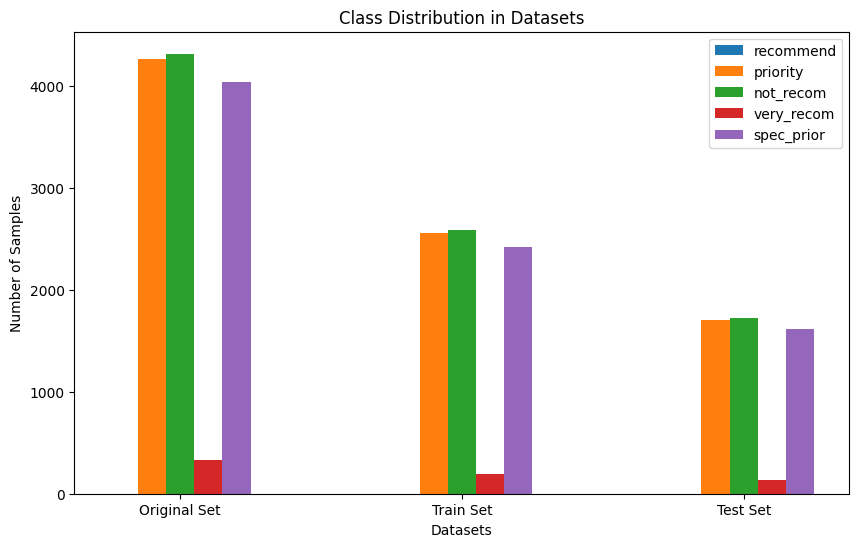

[[   2 4266 4320  328 4044]
 [   1 2560 2592  197 2426]
 [   1 1706 1728  131 1618]]


In [437]:
visualize_distribution(1)

### Train/test: 80/20

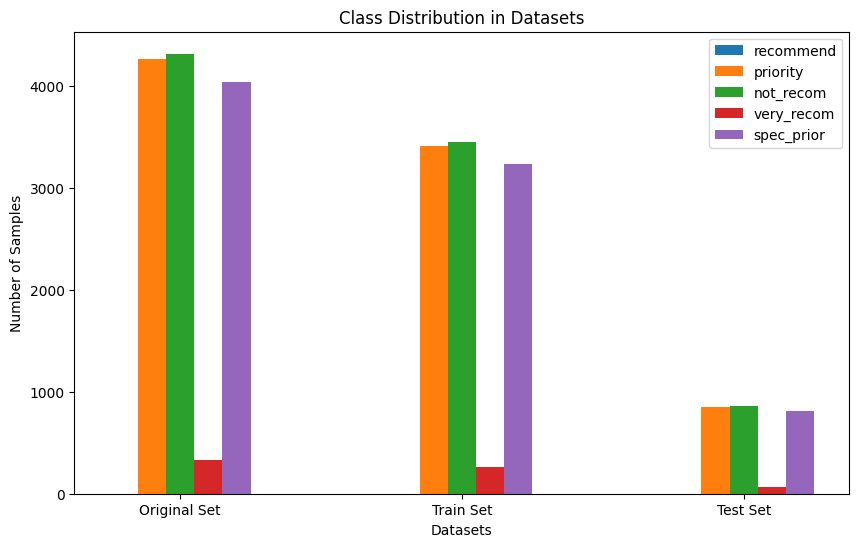

[[   2 4266 4320  328 4044]
 [   2 3413 3456  262 3235]
 [   0  853  864   66  809]]


In [438]:
visualize_distribution(2)

### Train/test: 90/10

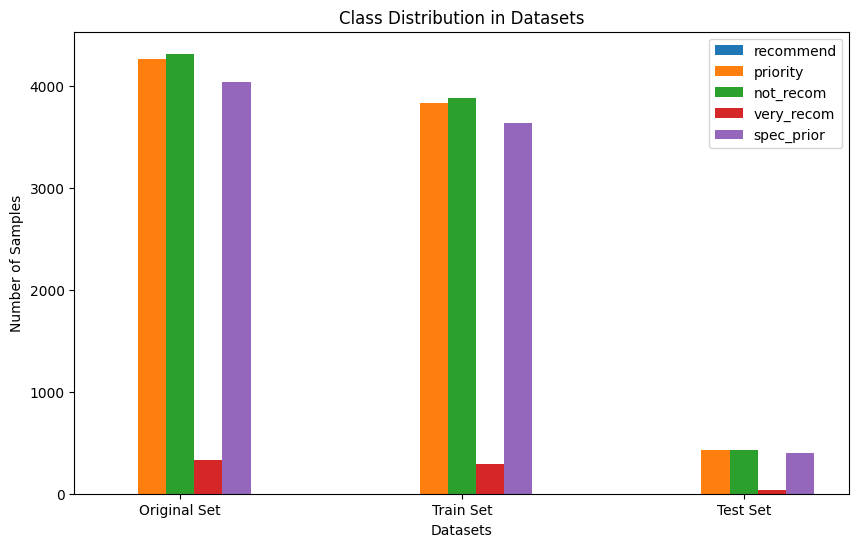

[[   2 4266 4320  328 4044]
 [   2 3839 3888  295 3640]
 [   0  427  432   33  404]]


In [439]:
visualize_distribution(3)

# 2 Building the decision tree classifiers

In [440]:
def create_decision_tree(feature_dataset, label_dataset,depth=None):

    tree = DecisionTreeClassifier(criterion='entropy',max_depth= depth)

    tree.fit(feature_dataset,label_dataset)
    return tree

In [441]:
# Create Feature_name and class_name
feature_name = ['parents','has_nurs','form','children','housing','finance','social','health']
class_name = ['recommend','priority','not_recom','very_recom','spec_prior']

In [442]:
def export_decision_tree(decision_tree_model,tail):
    # Visualize cây quyết định bằng Graphviz
    dot_data = tree.export_graphviz(decision_tree_model, out_file=None,
                                feature_names=feature_name,
                                class_names=class_name,
                                filled=True, rounded=True,
                                special_characters=True,
                                impurity=True)
    graph = graphviz.Source(dot_data)
    graph.render("decision_tree"+tail)  # Lưu biểu đồ vào tệp "decision_tree.pdf"
    #graph.view()  # Hiển thị biểu đồ

In [443]:
def visualize_decision_tree(decision_tree_model):
    plt.figure(figsize=(20, 10))
    plot_tree(decision_tree_model, filled=True, 
              feature_names=feature_name, 
              class_names=class_name,
              rounded=True)
    plt.show()

In [444]:
list_decision_tree = []
for i in range(len(list_data_set)):
    data_sets = list_data_set[i]
    feature_train, label_train, feature_test, label_test = data_sets
    feature_train = feature_train.reset_index(drop=True)
    decision_tree_model = create_decision_tree(feature_train, label_train)
    list_decision_tree.append(decision_tree_model)
    # Tiếp tục thực hiện các công việc khác với mô hình đã xây dựng

In [445]:

name = ['4060','6040','8020','9010']

for i in range(len(list_decision_tree)):
    export_decision_tree(list_decision_tree[i],'_'+name[i])

### Evaluating the decision tree classifiers


In [446]:

    
def evaluating_decision_tree(model_tree,feature_test,label_test,string_proportion):
    print('Evaluating train/test ',string_proportion,'\n')

    predictions = model_tree.predict(feature_test)
    class_name_uni = np.concatenate([np.array(predictions), np.array(label_test)], axis=0)
    class_name_uni = np.unique(class_name_uni)
    # Tính ma trận nhầm lẫn
    confusion = confusion_matrix(label_test, predictions)
    print("Confusion Matrix using Heatmap:")
    # Lấy tên các lớp
    tmp1 = np.unique(label_test)
    tmp2 = np.unique(predictions)
    class_names = []
    if(len(tmp1)>len(tmp2)): class_names = tmp1.copy()
    else: class_names = tmp2.copy()

    # Vẽ heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    # Tính báo cáo phân loại
    report = classification_report(label_test, predictions, target_names=class_name_uni, zero_division=1)
    print("Classification Report:")
    print(report)
    
    print("========================================================================")
    #break

Evaluating train/test  40/60 

Confusion Matrix using Heatmap:


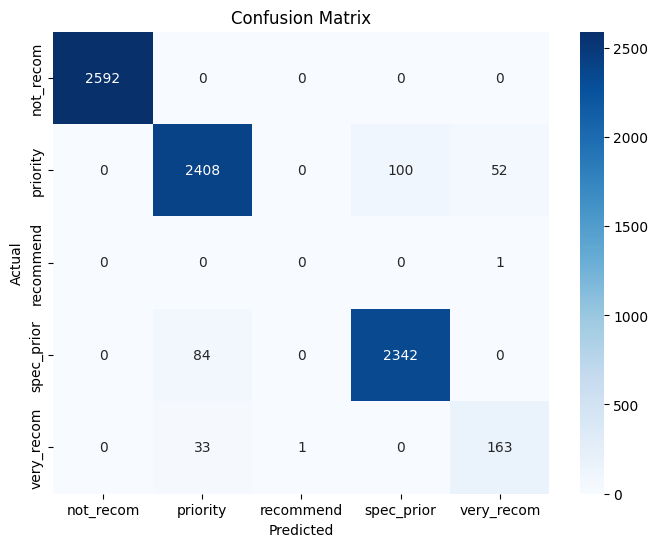

Classification Report:
              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00      2592
    priority       0.95      0.94      0.95      2560
   recommend       0.00      0.00      1.00         1
  spec_prior       0.96      0.97      0.96      2426
  very_recom       0.75      0.83      0.79       197

    accuracy                           0.97      7776
   macro avg       0.73      0.75      0.94      7776
weighted avg       0.97      0.97      0.97      7776

Evaluating train/test  60/40 

Confusion Matrix using Heatmap:


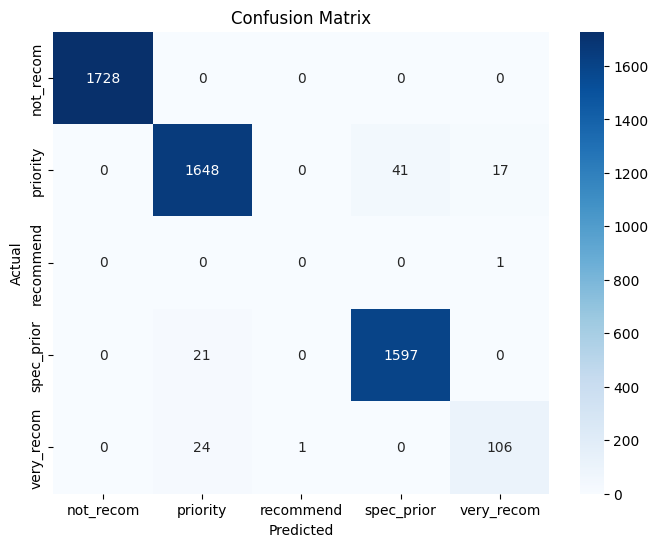

Classification Report:
              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00      1728
    priority       0.97      0.97      0.97      1706
   recommend       0.00      0.00      1.00         1
  spec_prior       0.97      0.99      0.98      1618
  very_recom       0.85      0.81      0.83       131

    accuracy                           0.98      5184
   macro avg       0.76      0.75      0.96      5184
weighted avg       0.98      0.98      0.98      5184

Evaluating train/test  80/20 

Confusion Matrix using Heatmap:


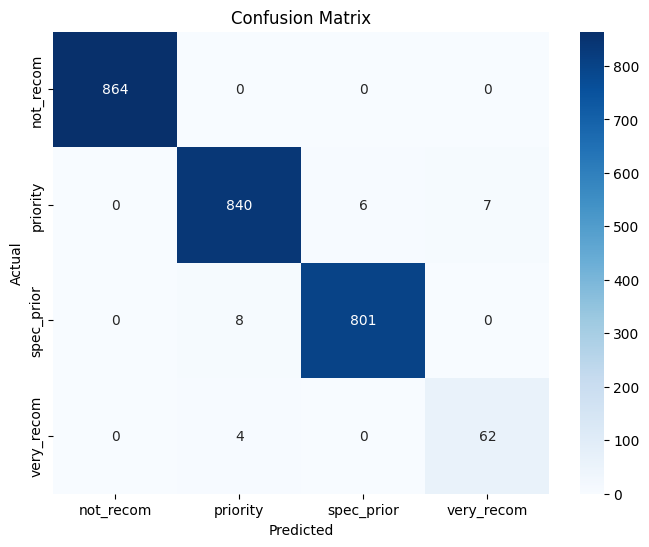

Classification Report:
              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       864
    priority       0.99      0.98      0.99       853
  spec_prior       0.99      0.99      0.99       809
  very_recom       0.90      0.94      0.92        66

    accuracy                           0.99      2592
   macro avg       0.97      0.98      0.97      2592
weighted avg       0.99      0.99      0.99      2592

Evaluating train/test  90/10 

Confusion Matrix using Heatmap:


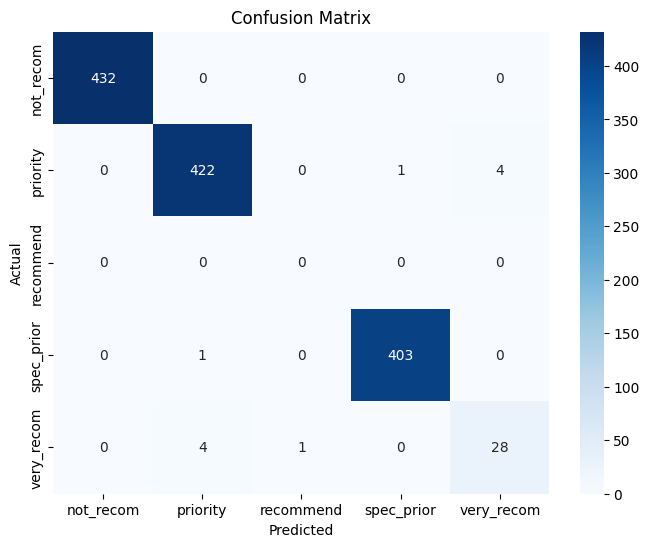

Classification Report:
              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       432
    priority       0.99      0.99      0.99       427
   recommend       0.00      1.00      0.00         0
  spec_prior       1.00      1.00      1.00       404
  very_recom       0.88      0.85      0.86        33

    accuracy                           0.99      1296
   macro avg       0.77      0.97      0.77      1296
weighted avg       0.99      0.99      0.99      1296



In [447]:
pro_train_test = ['40/60', '60/40', '80/20', '90/10']
count = 0
for test_dataset,model_tree in zip(list_data_set,list_decision_tree):
    feature_train,label_train,feature_test,label_test = test_dataset
    evaluating_decision_tree(model_tree,feature_test,label_test,pro_train_test[count])
    count+=1
     # Dự đoán trên tập kiểm tra

### The depth and accuracy of a decision tree

##### Work on 80/20 train/test

In [448]:
feature_train,label_train,feature_test,label_test = list_data_set[2]

#### Try on different depth: None,2,3,4,5,6,7

In [449]:
try_depth = [None, 2, 3, 4, 5, 6, 7]
new_models = []
for dep in try_depth:
    new_model = create_decision_tree(feature_train,label_train,depth=dep)
    new_models.append(new_model)
    export_decision_tree(new_model,tail = '_max_depth_'+str(dep))

#### Calculating the accuracy score for each model above


In [450]:
accuracy_list = []
for model,level_try in zip(new_models,try_depth):
    prediction = model.predict(feature_test)
    accuracy = accuracy_score(label_test,prediction)
    accuracy_list.append(accuracy)
print(accuracy_list)

[0.9907407407407407, 0.7083333333333334, 0.7700617283950617, 0.7750771604938271, 0.8595679012345679, 0.8526234567901234, 0.8946759259259259]


Text(0.5, 0, 'Max Depth')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Accuracy vs Max Depth')

Text(0, 10, '0.99')

Text(0, 10, '0.71')

Text(0, 10, '0.77')

Text(0, 10, '0.78')

Text(0, 10, '0.86')

Text(0, 10, '0.85')

Text(0, 10, '0.89')

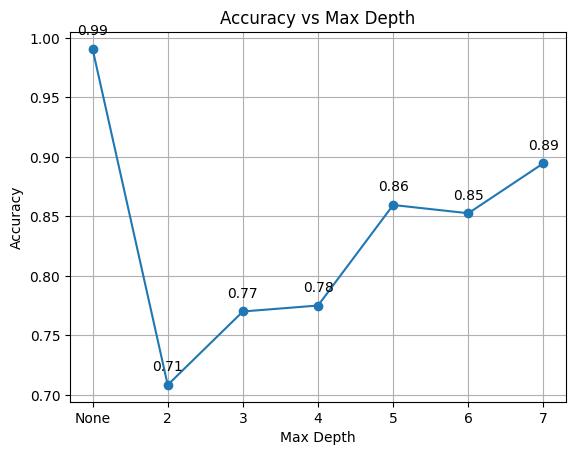

<Figure size 640x480 with 0 Axes>

In [451]:
try_depth_labels = [str(depth) if depth is not None else "None" for depth in try_depth]

# Vẽ biểu đồ
plt.plot(try_depth_labels, accuracy_list, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.grid(True)

# Thêm các con số accuracy
for x, y in zip(try_depth_labels, accuracy_list):
    plt.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

# Xóa dữ liệu biểu đồ trước khi vẽ lần tiếp theo
plt.clf()
